In [9]:
# ===============================
# 1. Import Required Libraries
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [10]:
# ===============================
# 2. Load Dataset
# ===============================

file_path = "superstore_enhanced.csv"

df = pd.read_csv(file_path)

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Cost,Order Year,Order Month,Order Month Name,Year-Month,Customer Lifetime Value,Churn Flag
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,7,57.011698,204.948302,2017,11,November,2017-11,1148.7800,1
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,4,94.850645,637.089355,2017,11,November,2017-11,1148.7800,1
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,8,2.124395,12.495605,2017,6,June,2017-06,1119.4830,0
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,285.049889,672.527611,2016,10,October,2016-10,2602.5755,0
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2.503075,19.864925,2016,10,October,2016-10,2602.5755,0


In [11]:
# ===============================
# 3. Dataset Overview
# ===============================

print("Shape of dataset:", df.shape)
print("\nColumn Names:")
print(df.columns)

df.info()


Shape of dataset: (9800, 27)

Column Names:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Profit', 'Cost', 'Order Year',
       'Order Month', 'Order Month Name', 'Year-Month',
       'Customer Lifetime Value', 'Churn Flag'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Row ID                   9800 non-null   int64  
 1   Order ID                 9800 non-null   object 
 2   Order Date               9800 non-null   object 
 3   Ship Date                9800 non-null   object 
 4   Ship Mode                9800 non-null   object 
 5   Customer ID              9800 non-null   o

In [12]:
# ===============================
# 4. Convert Order Date Properly
# ===============================

df["Order Date"] = pd.to_datetime(
    df["Order Date"],
    dayfirst=True,
    errors="coerce"
)

print("Null dates after conversion:", df["Order Date"].isnull().sum())


Null dates after conversion: 0


In [13]:
# ===============================
# 5. Missing Value Check
# ===============================

df.isnull().sum()


Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal Code                11
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Profit                      0
Cost                        0
Order Year                  0
Order Month                 0
Order Month Name            0
Year-Month                  0
Customer Lifetime Value     0
Churn Flag                  0
dtype: int64

In [14]:
# ===============================
# 6. Duplicate Check
# ===============================

print("Duplicate Rows:", df.duplicated().sum())

df = df.drop_duplicates()


Duplicate Rows: 0


In [15]:
# ===============================
# 7. Create Time Columns
# ===============================

df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Month Name"] = df["Order Date"].dt.month_name()
df["Year-Month"] = df["Order Date"].dt.to_period("M")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Cost,Order Year,Order Month,Order Month Name,Year-Month,Customer Lifetime Value,Churn Flag
0,1,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,7,57.011698,204.948302,2017,11,November,2017-11,1148.7800,1
1,2,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,4,94.850645,637.089355,2017,11,November,2017-11,1148.7800,1
2,3,CA-2017-138688,2017-06-12,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,8,2.124395,12.495605,2017,6,June,2017-06,1119.4830,0
3,4,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,285.049889,672.527611,2016,10,October,2016-10,2602.5755,0
4,5,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2.503075,19.864925,2016,10,October,2016-10,2602.5755,0


In [16]:
# ===============================
# 8. Core KPI Metrics
# ===============================

total_revenue = df["Sales"].sum()
total_profit = df["Profit"].sum()
profit_margin = (total_profit / total_revenue) * 100

total_customers = df["Customer ID"].nunique()
churned_customers = df[df["Churn Flag"] == 1]["Customer ID"].nunique()
churn_rate = (churned_customers / total_customers) * 100

print("Total Revenue:", round(total_revenue, 2))
print("Total Profit:", round(total_profit, 2))
print("Profit Margin %:", round(profit_margin, 2))
print("Total Customers:", total_customers)
print("Churn Rate %:", round(churn_rate, 2))


Total Revenue: 2261536.78
Total Profit: 392292.17
Profit Margin %: 17.35
Total Customers: 793
Churn Rate %: 25.47


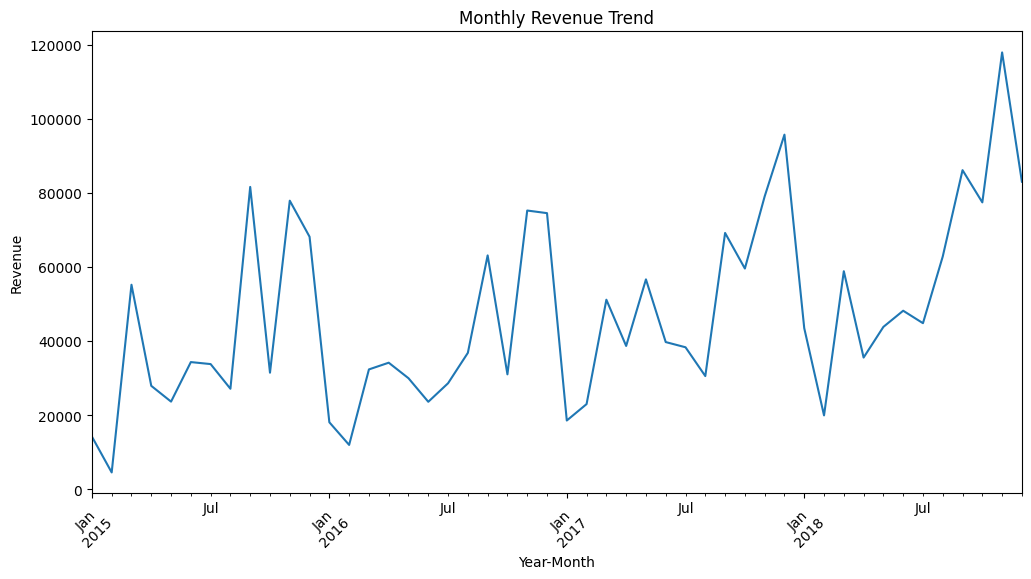

In [17]:
# ===============================
# 9. Monthly Revenue Trend
# ===============================

monthly_sales = df.groupby("Year-Month")["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [20]:
# ===============================
# 10. Save Cleaned Dataset
# ===============================

output_path = "superstore_cleaned.csv"

df.to_csv(output_path, index=False)

print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
